In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics as sts 
import plotly as ply 
import plotly.express as px  
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#Carregando os dados a partir do arquivo:
df = pd.read_csv(r"C:\Users\fernog\OneDrive - DNV\Documentos\Python\Cursos\Udemy\Formação CD\10.Prática em Python\dados\Churn.csv", sep=';')

#Colocando as colunas do DataFrame
df.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"] 

print(" 📊 Informações Gerais do Dataset") 
print(f"- Dimensões: {df.shape[0]} linhas e {df.shape[1]} colunas") 
print(f"- Variável alvo: ' Saiu' (Churn)") 
print(f"- Taxa de churn: {df['Saiu'].mean():.2%}") 
print("\n📋 Primeiras 10 Linhas:") 
df.head(10)

 📊 Informações Gerais do Dataset
- Dimensões: 999 linhas e 12 colunas
- Variável alvo: ' Saiu' (Churn)
- Taxa de churn: 20.32%

📋 Primeiras 10 Linhas:


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,1.013489e+07,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,1.125426e+07,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,1.139316e+07,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9.382663e+06,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,7.908410e+05,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,1.497567e+07,1
6,7,822,RS,M,50,7,0,2,1,1,1.006280e+05,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,7.494050e+05,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7.172573e+06,0


In [3]:
# Informações detalhadas do dataset 
print("🔍 Informações detalhadas:")
print(f"- Tipos de dados:\n{df.dtypes}")
print(f"\n Valores únicos por coluna:\n{df.nunique()}")

🔍 Informações detalhadas:
- Tipos de dados:
Id                  int64
Score               int64
Estado             object
Genero             object
Idade               int64
Patrimonio          int64
Saldo               int64
Produtos            int64
TemCartCredito      int64
Ativo               int64
Salario           float64
Saiu                int64
dtype: object

 Valores únicos por coluna:
Id                998
Score             354
Estado              6
Genero              5
Idade              64
Patrimonio         11
Saldo             649
Produtos            4
TemCartCredito      2
Ativo               2
Salario           987
Saiu                2
dtype: int64


In [4]:
#Informações detalhadas parte 2:
print("🔍 Informações detalhadas (Pt. 2):") 
print(f"\n - Valores nulos: \n{df.isnull().sum()}")
print(f"\n - Média dos valores nulos: \n{df.isna().mean()}")


🔍 Informações detalhadas (Pt. 2):

 - Valores nulos: 
Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

 - Média dos valores nulos: 
Id                0.000000
Score             0.000000
Estado            0.000000
Genero            0.008008
Idade             0.000000
Patrimonio        0.000000
Saldo             0.000000
Produtos          0.000000
TemCartCredito    0.000000
Ativo             0.000000
Salario           0.007007
Saiu              0.000000
dtype: float64


In [5]:
#Informações detalhadas parte 3:
print("🔍 Informações detalhadas (Pt. 3):")  
print(f"\n - Estatísticas descritivas:\n{df.describe().round(2)}")

🔍 Informações detalhadas (Pt. 3):

 - Estatísticas descritivas:
            Id   Score  Idade  Patrimonio        Saldo  Produtos  \
count   999.00  999.00  999.0      999.00       999.00    999.00   
mean    500.92  648.62   38.9        5.07   7164927.56      1.53   
std     288.66   98.26   11.4        2.93   6311840.13      0.57   
min       1.00  376.00  -20.0        0.00         0.00      1.00   
25%     251.50  580.00   32.0        2.00         0.00      1.00   
50%     501.00  653.00   37.0        5.00   8958835.00      1.00   
75%     750.50  721.00   44.0        8.00  12586844.00      2.00   
max    1000.00  850.00  140.0       10.00  21177431.00      4.00   

       TemCartCredito   Ativo       Salario   Saiu  
count          999.00  999.00  9.920000e+02  999.0  
mean             0.70    0.51  3.528762e+07    0.2  
std              0.46    0.50  5.305800e+08    0.4  
min              0.00    0.00  9.677000e+03    0.0  
25%              0.00    0.00  3.029011e+06    0.0  
50%  

## 🔍 2. Análise Exploratória de Dados (EDA) Avançada


##  📊 Tratando as colunas não numéricas 

In [6]:
print("🔍 Informações detalhadas das colunas não numéricas:")
print("----------------------------------------------")
print(f"Dados da coluna Estado:{df['Estado'].describe()}") 
print("----------------------------------------------")
print(f" Dados da coluna Gênero:{df['Genero'].describe()}") 


🔍 Informações detalhadas das colunas não numéricas:
----------------------------------------------
Dados da coluna Estado:count     999
unique      6
top        RS
freq      478
Name: Estado, dtype: object
----------------------------------------------
 Dados da coluna Gênero:count           991
unique            5
top       Masculino
freq            521
Name: Genero, dtype: object


In [7]:
# Fazendo uma limpeza inicial dos dados - Tratando os valores inconsistentes:
print("Iniciando a limpeza... 🧹") 

# Cirando um Backuo do dataset original - importante para a Preservação dos dados brutos
df_ori = df.copy() 

#Tratando a coluna Estado:
df.loc[df['Estado'].isin(["TD", "RP"]), "Estado"] = "RS" # Trocando os valores estranhos na coluna pela moda 

#Tratando a coluna Gênero: 
df.loc[df['Genero'].isin(["F", "Fem"]), "Genero"] = "Feminino" 
df.loc[df['Genero'].isin(["M"]), "Genero"] = "Maculino"  
df['Genero'] = df['Genero'].fillna("Masculino") #Trocando os calores NaN pela moda da coluna

print("✅ Limpeza de dados concluída!") 
print(f"- Registros tratados na coluna Estado: {len(df_ori.loc[df_ori['Estado'].isin(["TD", "RP"])])}")
print(f"- Registros tratados na coluna Genero: {len(df_ori.loc[df_ori['Genero'].isin(["F", "Fem", "M"])])}")


Iniciando a limpeza... 🧹
✅ Limpeza de dados concluída!
- Registros tratados na coluna Estado: 2
- Registros tratados na coluna Genero: 9


##  📊 Tratando as colunas  numéricas 

In [8]:
print("🔍 Informações detalhadas das colunas numéricas:")
print("----------------------------------------------")
print(f"Dados da coluna Score:{df['Score'].describe()}") 
print("----------------------------------------------")
print(f" Dados da coluna Idade:{df['Idade'].describe()}") 
print("----------------------------------------------")


🔍 Informações detalhadas das colunas numéricas:
----------------------------------------------
Dados da coluna Score:count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64
----------------------------------------------
 Dados da coluna Idade:count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64
----------------------------------------------


In [9]:
print("🔍 Informações detalhadas das colunas numéricas:")
print("----------------------------------------------")
print(f"Dados da coluna Patrimonio:{df['Patrimonio'].describe()}") 
print("----------------------------------------------")
print(f" Dados da coluna Saldo:{df['Saldo'].describe()}") 
print("----------------------------------------------") 
print(f" Dados da coluna Salario:{df['Salario'].describe()}") 
print("----------------------------------------------")



🔍 Informações detalhadas das colunas numéricas:
----------------------------------------------
Dados da coluna Patrimonio:count    999.000000
mean       5.069069
std        2.927691
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Patrimonio, dtype: float64
----------------------------------------------
 Dados da coluna Saldo:count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64
----------------------------------------------
 Dados da coluna Salario:count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64
----------------------------------------------


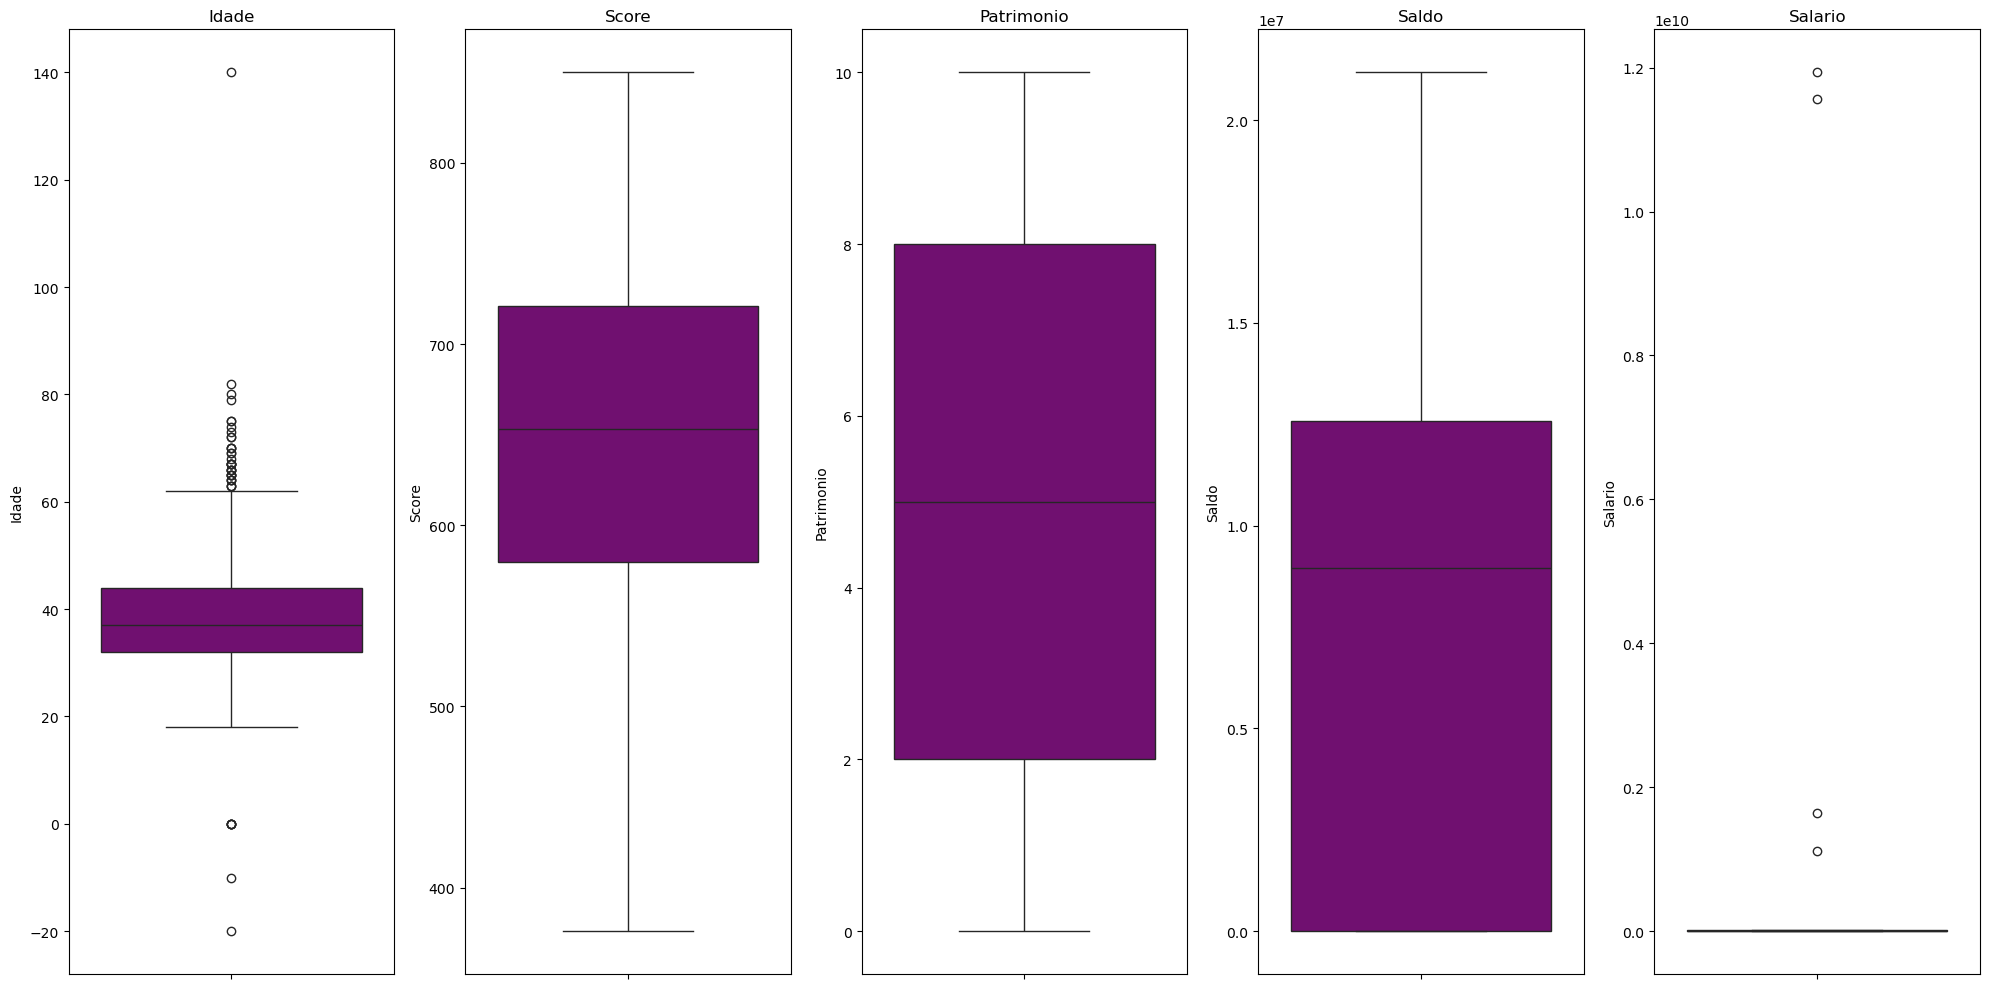

In [10]:
#Plotando 5 gráficos em uma imagem só pegando as colunas numéricas e plotando um gráfico de boxplot
fig, axes = plt.subplots(1, 5, figsize=(20, 10))  
colunas = ['Idade', 'Score', 'Patrimonio', 'Saldo', 'Salario']

# Criando um Loop para plotar cada boxplot no respectivo eixo
for ax, col in zip(axes, colunas):
    sns.boxplot(y=df_ori[col], ax=ax, color='purple')
    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

In [11]:
#Tratamento de outliers na coluna Idade:
mediana = sts.median(df['Idade'])
df.loc[(df['Idade'] < 1) | (df['Idade'] > 59), 'Idade'] = mediana  #Pegando os outliers e substituindo pela mediana

print("🧹 Iniciando limpeza de dados...")
print("✅ Limpeza de dados Concluída")
print(f"Mediana da Coluna idade: {mediana}")
print(f"- Outliers de idade corrigidos: {len(df_ori.loc[(df_ori['Idade'] < 1) | (df_ori['Idade'] > 59)])}")

🧹 Iniciando limpeza de dados...
✅ Limpeza de dados Concluída
Mediana da Coluna idade: 37
- Outliers de idade corrigidos: 62


# Análise da Variável Alvo 🔍 (Churn)

## Objetivo da Análise

A análise da variável alvo **Churn** tem como objetivo compreender a proporção de clientes que deixaram o banco versus aqueles que permaneceram ativos.

## Metodologia de Visualização

Foram implementadas duas perspectivas complementares:

### 1. Gráfico de Pizza (Donut Chart)
- Apresenta a distribuição percentual entre as categorias
- Facilita a compreensão das proporções relativas
- Formato visual intuitivo para comparar partes com o todo

### 2. Gráfico de Barras
- Mostra as contagens absolutas de cada categoria
- Permite análise quantitativa precisa
- Complementa a visão percentual com números concretos

## Importância para o Projeto

**Identificação de Desequilíbrio entre Classes:**
- Crucial para determinar a necessidade de técnicas de balanceamento
- Impacta diretamente na escolha de métricas de avaliação do modelo
- Influencia estratégias de amostragem e tratamento de dados


### Aplicações Práticas:
- Estabelece baseline para modelos preditivos
- Fornece referência para comparações futuras
- Auxilia no planejamento de estratégias de retenção
- Define expectativas realistas para performance do modelo

**Esta análise preliminar é fundamental para embasar decisões técnicas subsequentes no fluxo de ciência de dados.**

C:\Users\fernog\AppData\Local\Temp\ipykernel_34272\3029277626.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Saiu', ax=axes[1], palette=['lightblue', 'salmon'])


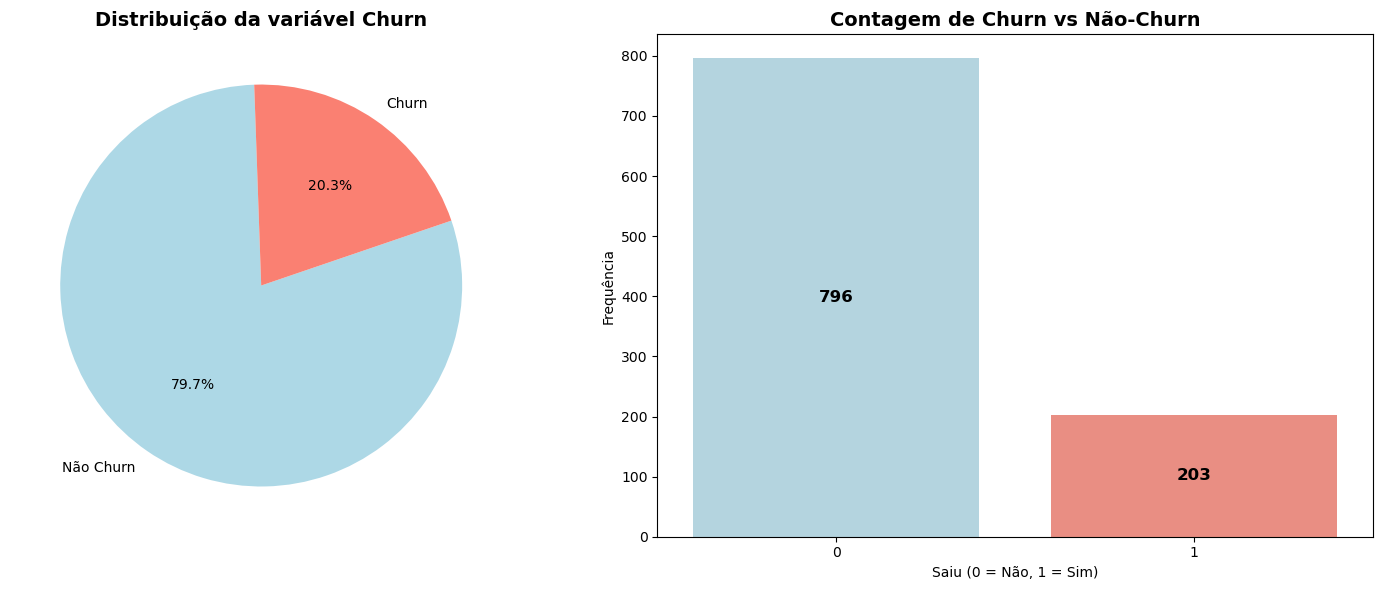

📊 Análise da Variável Alvo:
- Total de Clientes: 999
- Clientes que saíram: 203 (20.3%)
- Clientes que permanceram: 796 (79.7%)
- Taxa de Churn: 20.3%


In [12]:
# Análise da variável alvo (Churn)
fig, axes = plt.subplots(1, 2, figsize=(15,6)) 

#Distribuição do Churn:
churn_counts = df['Saiu'].value_counts()
axes[0].pie(churn_counts.values, labels=['Não Churn', 'Churn'], autopct='%1.1f%%',
            colors=['lightblue', 'salmon'], startangle=92)
axes[0].set_title('Distribuição da variável Churn', fontsize=14, fontweight='bold')


#Gráfico de Barras:
sns.countplot(data=df, x='Saiu', ax=axes[1], palette=['lightblue', 'salmon'])
axes[1].set_title("Contagem de Churn vs Não-Churn", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Saiu (0 = Não, 1 = Sim)") 
axes[1].set_ylabel("Frequência") 
                  
#Adicionando os valores nas barras:               
for i, v in enumerate(churn_counts):
    axes[1].text(i, v/2, str(v), ha='center', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()
        
print(f"📊 Análise da Variável Alvo:")
print(f"- Total de Clientes: {len(df)}")
print(f"- Clientes que saíram: {churn_counts[1]} ({churn_counts[1]/len(df)*100:.1f}%)") 
print(f"- Clientes que permanceram: {churn_counts[0]} ({churn_counts[0]/len(df)*100:.1f}%)") 
print(f"- Taxa de Churn: {churn_counts[1]/len(df)*100:.1f}%")

# Análise de Variáveis Categóricas 🔍

## Visualização da Distribuição

O código cria uma visualização com 4 subplots (2x2) para analisar a distribuição das variáveis categóricas:

- **Estado**: Localização geográfica dos clientes
- **Gênero**: Distribuição por gênero
- **TemCartCredito**: Se o cliente possui cartão de crédito
- **Ativo**: Status de atividade do cliente

Cada gráfico de barras mostra:
- Contagem absoluta de cada categoria
- Distribuição visual usando palette 'viridis'
- Valores numéricos destacados acima das barras
- Títulos claros e formatação profissional



C:\Users\fernog\AppData\Local\Temp\ipykernel_34272\1022982522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
C:\Users\fernog\AppData\Local\Temp\ipykernel_34272\1022982522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
C:\Users\fernog\AppData\Local\Temp\ipykernel_34272\1022982522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
C:\Users\fernog\AppData\Local\Temp\ipykernel_34272\1022

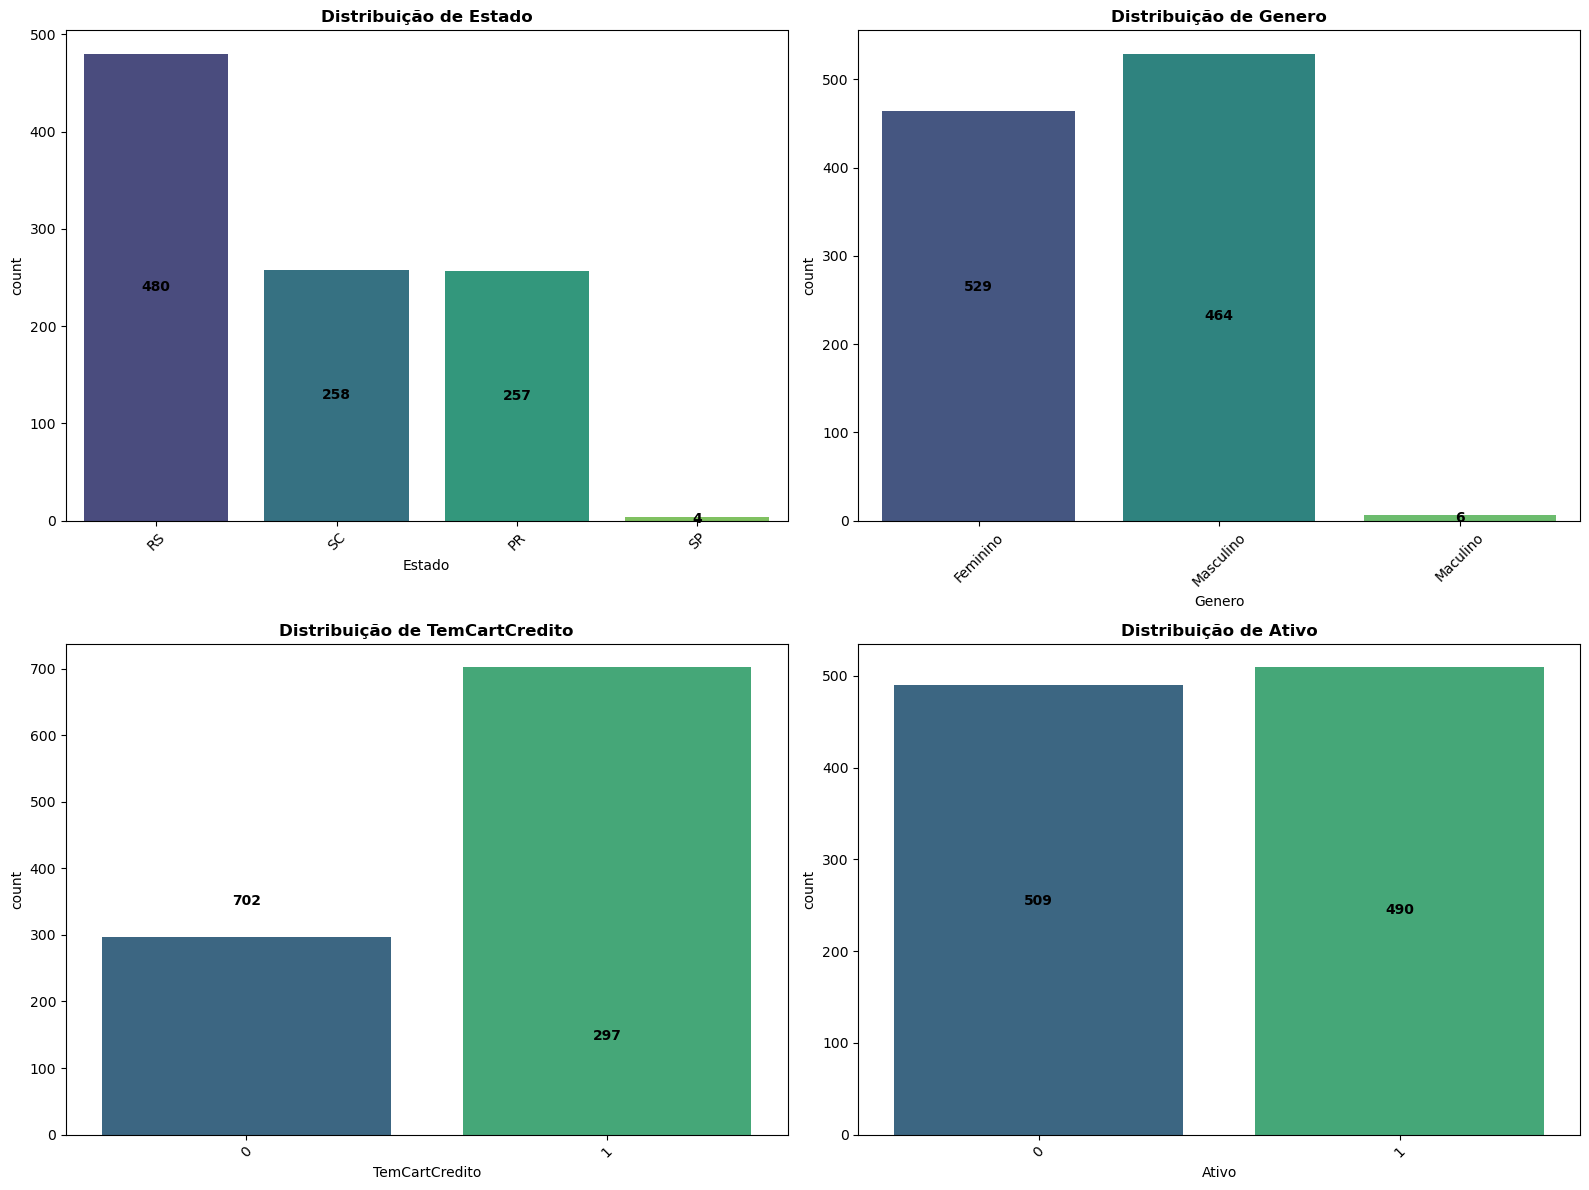

🔍 Taxa de Churn por Categoria:

📊 Estado:
  • PR: 29.2%
  • SC: 19.8%
  • RS: 16.0%
  • SP: 0.0%

📊 Genero:
  • Feminino: 25.9%
  • Masculino: 15.7%
  • Maculino: 0.0%

📊 TemCartCredito:
  • 1: 20.4%
  • 0: 20.2%

📊 Ativo:
  • 0: 29.0%
  • 1: 12.0%


In [13]:
#Analisando as variáveis categóricas 
cat_var = ['Estado', 'Genero', 'TemCartCredito', 'Ativo'] 

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel() 

for i, var in enumerate(cat_var):
    counts = df[var].value_counts() 

    #Plotando o gráfico de barras:
    sns.countplot(data=df, x=var, ax=axes[i], palette='viridis') 
    axes[i].set_title(f'Distribuição de {var}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45) 

# Adicionando os valores nas barras:
    for j, v in enumerate(counts.values):
        axes[i].text(j, v/2, str(v), ha='center', va='center', fontweight='bold')


    
plt.tight_layout()
plt.show()

# Análise de churn por categoria
print("🔍 Taxa de Churn por Categoria:")
for var in cat_var:
    churn_rate = df.groupby(var)['Saiu'].mean().sort_values(ascending=False)
    print(f"\n📊 {var}:")
    for category, rate in churn_rate.items():
        print(f"  • {category}: {rate:.1%}")

## **CORRELAÇÃO DOS DADOS** 📊

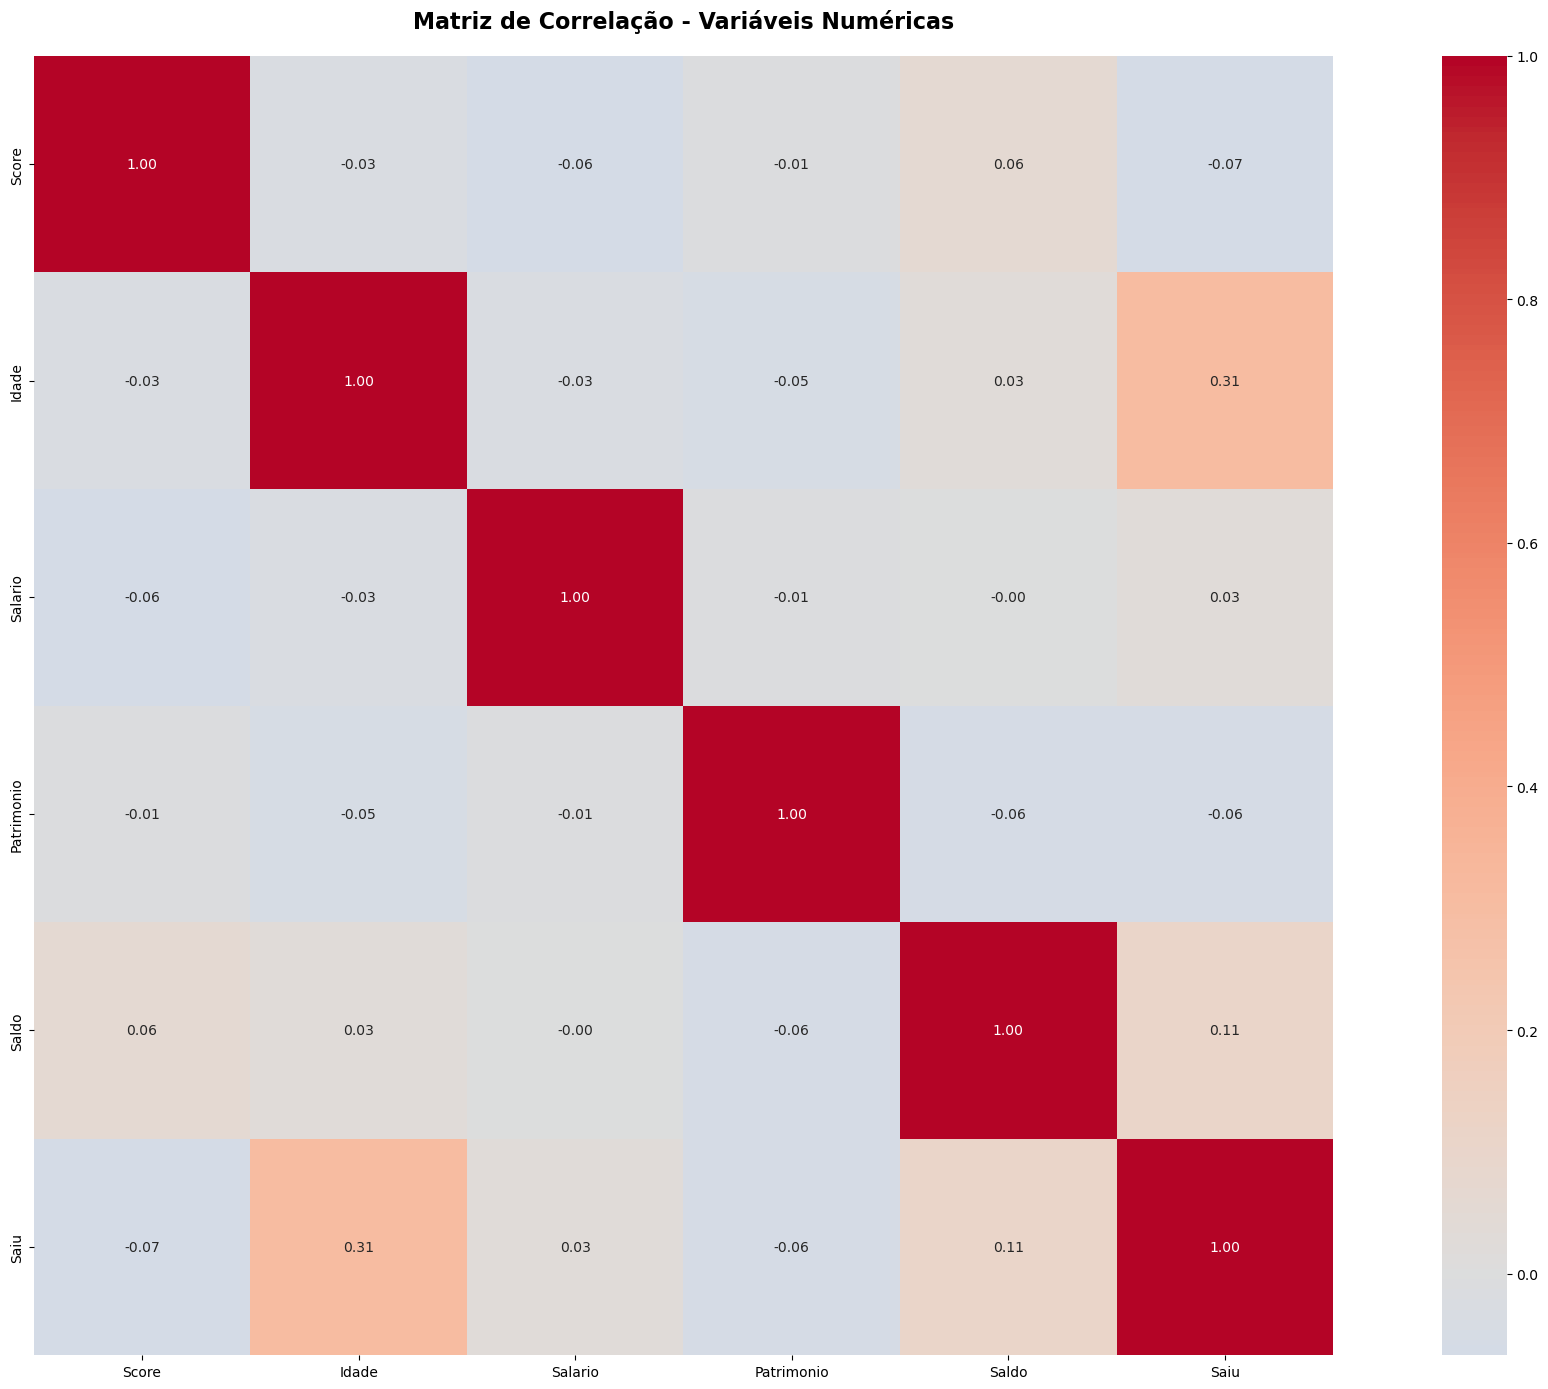

🔍 Correlações com a Variável Alvo (Churn):
• Idade: 0.311 (correlação positiva)
• Saldo: 0.109 (correlação positiva)
• Score: 0.067 (correlação negativa)
• Patrimonio: 0.059 (correlação negativa)
• Salario: 0.031 (correlação positiva)


In [14]:

plt.figure(figsize=(22, 14))
colunas_selecionadas = ['Score', 'Idade', 'Salario', 'Patrimonio', 'Saldo']
df_selecionado = df[colunas_selecionadas] 
corr_matrix = df[colunas_selecionadas + ['Saiu']].corr()  


sns.heatmap(corr_matrix, mask=False, square=True, annot=True, cmap= "coolwarm", center=0, fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show() 


# Análise de correlação com a variável alvo
churn_correlations = corr_matrix['Saiu'].drop('Saiu').abs().sort_values(ascending=False)
print("🔍 Correlações com a Variável Alvo (Churn):")
for var, corr in churn_correlations.items():
    direction = "positiva" if corr_matrix.loc[var, 'Saiu'] > 0 else "negativa"
    print(f"• {var}: {corr:.3f} (correlação {direction})")


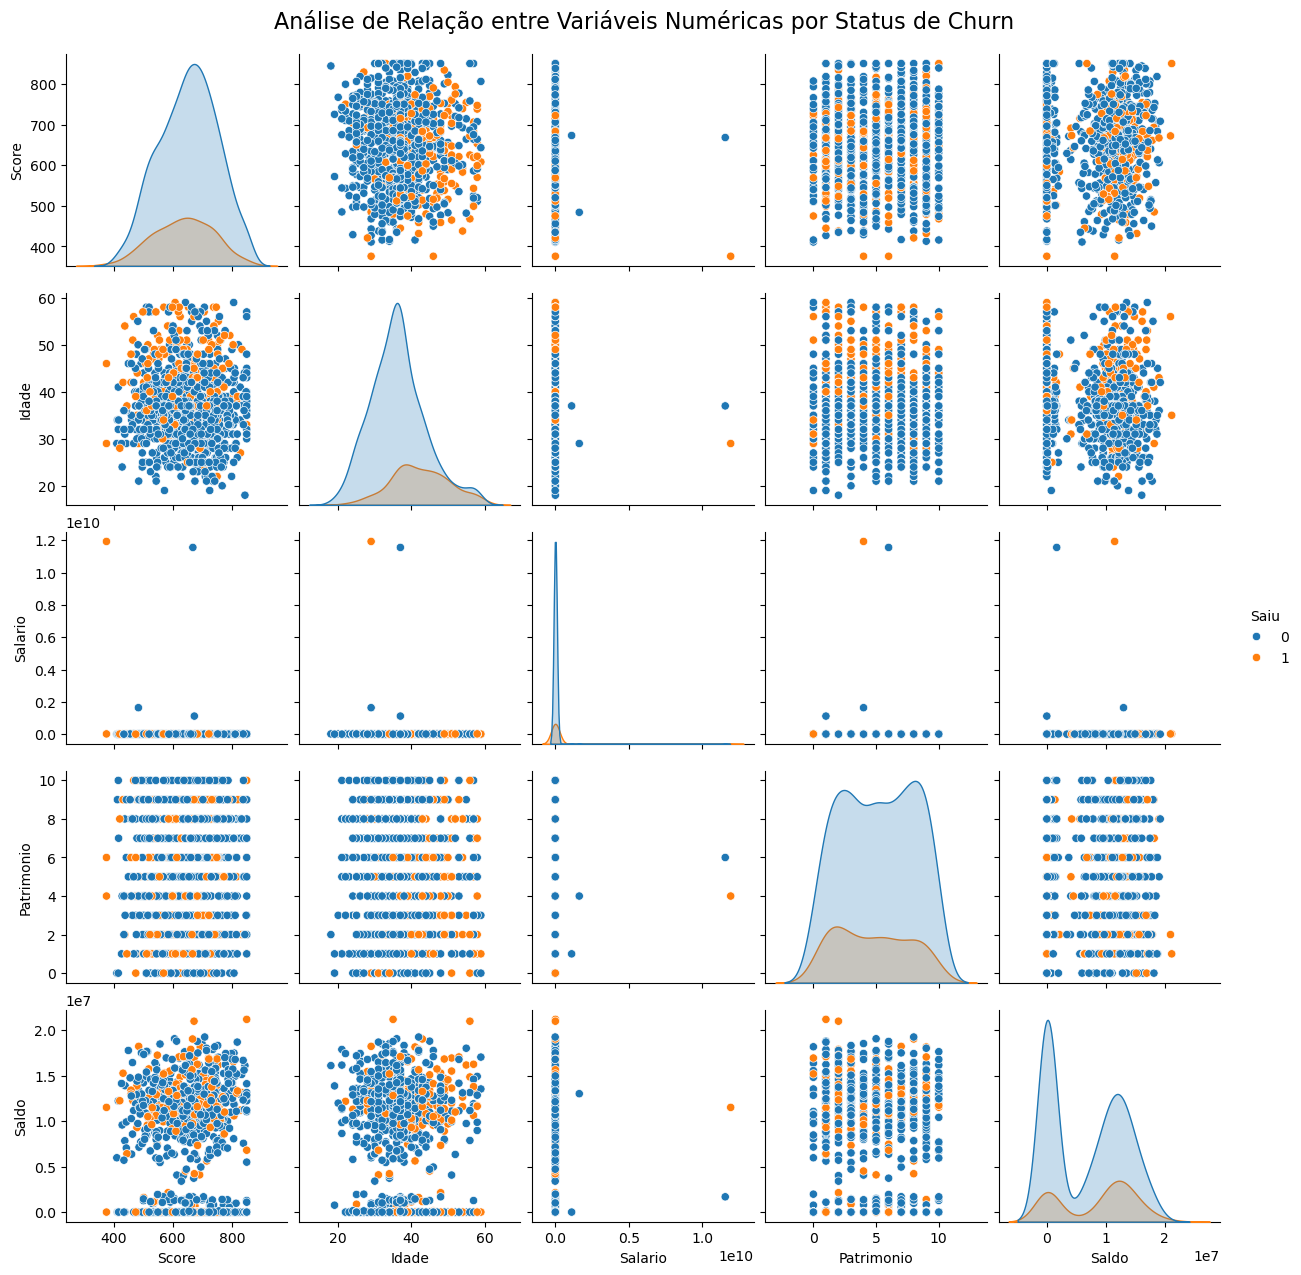

In [15]:
colunas_selecionadas2 = ['Score', 'Idade', 'Salario', 'Patrimonio', 'Saldo', 'Saiu']
sns.pairplot(df[colunas_selecionadas2], hue='Saiu', diag_kind='kde') 

plt.suptitle('Análise de Relação entre Variáveis Numéricas por Status de Churn', y=1.02, fontsize=16)
plt.show()

In [16]:
#Carregando os dados Limpos
df.to_excel('dados_limpos_churn.xlsx', index=False)